In [1]:
from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from keras.layers import Conv1D, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\takea\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd

# CSV 파일 경로
file_path = r"C:\Users\takea\Desktop\DeepLearning\datasets\week6\pamap2.csv"

# CSV 파일을 데이터프레임으로 읽어오기
df = pd.read_csv(file_path, index_col=0)
df = df.iloc[:, 1:]
# 데이터프레임 출력
df

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,-0.069961,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,-0.431227,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,0.075692,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,-0.259058,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,0.377115,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,0.039195,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,0.011127,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,0.000674,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,-0.048145,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [3]:
df.columns

Index(['activityID', 'heartrate', 'handTemperature', 'handAcc16_1',
       'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
       'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2',
       'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype='object')

In [4]:
# 이제 filter 메서드를 사용하여 열을 선택할 수 있음
h_features = df.filter(regex='^hand')
c_features = df.filter(regex='^chest')

In [5]:
h_features

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4
2932,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.18250,-20.0857,1.000000,0.000000,0.000000,0.000000
2943,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,-0.431227,0.002685,-0.062964,9.14612,-67.39360,-20.5508,1.000000,0.000000,0.000000,0.000000
2954,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,0.075692,-0.030792,0.005246,9.69163,-67.08980,-21.2481,1.000000,0.000000,0.000000,0.000000
2965,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,-0.259058,-0.267895,-0.038533,9.58694,-67.08820,-20.8997,1.000000,0.000000,0.000000,0.000000
2976,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,0.377115,-0.023688,-0.020670,8.59622,-67.14860,-20.1947,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,0.039195,0.012003,-0.026437,17.71230,-4.80473,-41.8342,0.098351,0.690834,-0.098230,0.709526
2818413,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,0.011127,0.038150,0.059271,18.33580,-5.21004,-41.4393,0.103448,0.681431,-0.102632,0.717229
2818423,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,0.000674,0.034051,0.008866,17.71400,-4.92892,-41.8335,0.106560,0.672532,-0.107482,0.724427
2818435,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,-0.048145,0.034565,-0.001782,18.08540,-4.82465,-41.8349,0.111645,0.659422,-0.111658,0.735004


In [6]:
c_features

,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4
2932,32.1875,0.352225,9.72437,-1.686650,0.173568,9.69512,-1.534140,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.92280,1.000000,0.000000,0.000000,0.000000
2943,32.1875,0.125825,9.72560,-1.613310,0.143761,9.71023,-1.503690,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.64950,1.000000,0.000000,0.000000,0.000000
2954,32.1875,0.199567,9.64954,-1.689170,0.083704,9.75569,-1.533420,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.17650,1.000000,0.000000,0.000000,0.000000
2965,32.1875,0.279626,9.80069,-1.572050,0.114698,9.78564,-1.412620,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.29430,1.000000,0.000000,0.000000,0.000000
2976,32.1875,0.428255,9.64882,-1.685030,0.218926,9.60427,-1.398660,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.68360,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,34.1250,-2.176960,9.63375,0.397475,-2.399840,9.77329,0.703170,0.019680,0.018043,-0.013087,21.723400,-30.6849,8.91800,0.708509,-0.634045,-0.282846,-0.126490
2818413,34.1250,-2.145710,9.63208,0.165721,-2.266810,9.53169,0.565652,0.056830,-0.038897,0.005755,21.973900,-29.9201,8.63339,0.707368,-0.634429,-0.284291,-0.127709
2818423,34.1250,-1.882640,9.51751,0.054697,-2.161590,9.57682,0.504698,-0.060698,-0.026238,0.049355,21.971700,-30.6947,9.48380,0.707725,-0.633875,-0.283496,-0.130221
2818435,34.1250,-1.867470,9.63384,0.557966,-2.128490,9.69697,0.882662,-0.025373,0.022089,0.019818,21.863500,-30.8185,8.35572,0.709159,-0.632941,-0.281281,-0.131758


# Check Point

In [7]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [8]:
h_features.insert(0, 'activityID', df['activityID'])
h_features = h_features[h_features['activityID'] != 12]

In [9]:
c_features.insert(0, 'activityID', df['activityID'])
c_features = c_features[c_features['activityID'] != 12]

### 다시 원핫인코딩 해야함 (순서대로)

In [10]:
h_features['activityID'].value_counts()

4     20998
1     17575
3     17256
2     16881
7     16857
13     9585
5      8665
Name: activityID, dtype: int64

In [11]:
c_features['activityID'].value_counts()

4     20998
1     17575
3     17256
2     16881
7     16857
13     9585
5      8665
Name: activityID, dtype: int64

In [12]:
h_features

,activityID,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4
2932,1,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.18250,-20.0857,1.000000,0.000000,0.000000,0.000000
2943,1,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,-0.431227,0.002685,-0.062964,9.14612,-67.39360,-20.5508,1.000000,0.000000,0.000000,0.000000
2954,1,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,0.075692,-0.030792,0.005246,9.69163,-67.08980,-21.2481,1.000000,0.000000,0.000000,0.000000
2965,1,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,-0.259058,-0.267895,-0.038533,9.58694,-67.08820,-20.8997,1.000000,0.000000,0.000000,0.000000
2976,1,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,0.377115,-0.023688,-0.020670,8.59622,-67.14860,-20.1947,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,5,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,0.039195,0.012003,-0.026437,17.71230,-4.80473,-41.8342,0.098351,0.690834,-0.098230,0.709526
2818413,5,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,0.011127,0.038150,0.059271,18.33580,-5.21004,-41.4393,0.103448,0.681431,-0.102632,0.717229
2818423,5,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,0.000674,0.034051,0.008866,17.71400,-4.92892,-41.8335,0.106560,0.672532,-0.107482,0.724427
2818435,5,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,-0.048145,0.034565,-0.001782,18.08540,-4.82465,-41.8349,0.111645,0.659422,-0.111658,0.735004


In [13]:
c_features['activityID'].value_counts()

4     20998
1     17575
3     17256
2     16881
7     16857
13     9585
5      8665
Name: activityID, dtype: int64

In [14]:
c_features

,activityID,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4
2932,1,32.1875,0.352225,9.72437,-1.686650,0.173568,9.69512,-1.534140,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.92280,1.000000,0.000000,0.000000,0.000000
2943,1,32.1875,0.125825,9.72560,-1.613310,0.143761,9.71023,-1.503690,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.64950,1.000000,0.000000,0.000000,0.000000
2954,1,32.1875,0.199567,9.64954,-1.689170,0.083704,9.75569,-1.533420,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.17650,1.000000,0.000000,0.000000,0.000000
2965,1,32.1875,0.279626,9.80069,-1.572050,0.114698,9.78564,-1.412620,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.29430,1.000000,0.000000,0.000000,0.000000
2976,1,32.1875,0.428255,9.64882,-1.685030,0.218926,9.60427,-1.398660,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.68360,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,5,34.1250,-2.176960,9.63375,0.397475,-2.399840,9.77329,0.703170,0.019680,0.018043,-0.013087,21.723400,-30.6849,8.91800,0.708509,-0.634045,-0.282846,-0.126490
2818413,5,34.1250,-2.145710,9.63208,0.165721,-2.266810,9.53169,0.565652,0.056830,-0.038897,0.005755,21.973900,-29.9201,8.63339,0.707368,-0.634429,-0.284291,-0.127709
2818423,5,34.1250,-1.882640,9.51751,0.054697,-2.161590,9.57682,0.504698,-0.060698,-0.026238,0.049355,21.971700,-30.6947,9.48380,0.707725,-0.633875,-0.283496,-0.130221
2818435,5,34.1250,-1.867470,9.63384,0.557966,-2.128490,9.69697,0.882662,-0.025373,0.022089,0.019818,21.863500,-30.8185,8.35572,0.709159,-0.632941,-0.281281,-0.131758


In [15]:
h_features.columns

Index(['activityID', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4'],
      dtype='object')

In [16]:
##x,y,z dont have the same variance so we need to scale the data 
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = h_features[['activityID', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4']]
              
y= h_features['activityID']
              
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_h_features_X = pd.DataFrame(data = X, columns = ['activityID', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4'])
scaled_h_features_X['label'] = y.values


scaled_h_features_X.head(10)

,activityID,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,label
0,-1.031113,-1.361349,0.978580,0.464209,0.739424,0.955278,0.497345,0.655821,-0.078447,-0.049460,0.017665,-0.448500,-2.303111,0.100911,1.361801,0.069562,0.28295,0.070149,1
1,-1.031113,-1.361349,0.970746,0.492467,0.591980,0.961563,0.519693,0.572836,-0.370276,-0.026971,-0.020431,-0.448925,-2.311975,0.074482,1.361801,0.069562,0.28295,0.070149,1
2,-1.031113,-1.361349,0.978428,0.444997,0.739560,0.975079,0.527815,0.701230,0.039211,-0.062800,0.018039,-0.426055,-2.299218,0.034859,1.361801,0.069562,0.28295,0.070149,1
3,-1.031113,-1.361349,1.006184,0.497727,0.760973,1.009988,0.568375,0.742415,-0.231198,-0.316561,-0.006652,-0.430444,-2.299151,0.054657,1.361801,0.069562,0.28295,0.070149,1
4,-1.031113,-1.361349,1.037855,0.596798,0.383124,1.010687,0.592660,0.356941,0.282700,-0.055196,0.003423,-0.471980,-2.301687,0.094717,1.361801,0.069562,0.28295,0.070149,1
5,-1.031113,-1.361349,1.014030,0.511382,0.593082,0.992050,0.548046,0.609944,-0.415868,-0.051204,-0.035398,-0.454985,-2.255734,-0.036397,1.361801,0.069562,0.28295,0.070149,1
6,-1.031113,-1.361349,1.053196,0.323229,0.459059,1.087702,0.345391,0.295735,-0.653277,0.183001,-0.105214,-0.388621,-2.160881,-0.325387,1.361801,0.069562,0.28295,0.070149,1
7,-1.031113,-1.361349,1.040668,0.550718,0.856086,1.017713,0.676420,0.816506,-0.403547,0.269686,0.035682,-0.318132,-2.197259,-0.294134,1.361801,0.069562,0.28295,0.070149,1
8,-1.031113,-1.361349,0.991117,0.493290,0.823579,1.000942,0.509314,0.759271,0.267485,1.090298,0.210343,-0.324945,-2.094662,-0.470086,1.361801,0.069562,0.28295,0.070149,1
9,-1.031113,-1.361349,0.908978,0.413297,1.084332,0.855266,0.420721,1.033436,0.269232,1.347898,0.087965,-0.206838,-2.116024,-0.386739,1.361801,0.069562,0.28295,0.070149,1


In [17]:
c_features.columns

Index(['activityID', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4'],
      dtype='object')

In [18]:
##x,y,z dont have the same variance so we need to scale the data 
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = c_features[['activityID', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4']]
              
y= c_features['activityID']
              
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_c_features_X = pd.DataFrame(data = X, columns = ['activityID', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4'])
scaled_c_features_X['label'] = y.values


scaled_c_features_X.head(10)

,activityID,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,label
0,-1.031113,-2.558845,-0.098581,0.285665,-0.482004,-0.126049,0.279122,-0.524519,-0.021838,0.022763,-0.086410,-0.332410,-1.129234,2.166315,1.362918,1.389655,-0.130238,-0.168463,1
1,-1.031113,-2.558845,-0.235534,0.285913,-0.465705,-0.144354,0.282160,-0.517738,-0.096509,-0.018246,-0.067334,-0.295292,-1.102047,2.250076,1.362918,1.389655,-0.130238,-0.168463,1
2,-1.031113,-2.558845,-0.190926,0.270603,-0.482564,-0.181235,0.291300,-0.524358,-0.046576,-0.049995,-0.105102,-0.299889,-1.136176,2.178622,1.362918,1.389655,-0.130238,-0.168463,1
3,-1.031113,-2.558845,-0.142497,0.301027,-0.456535,-0.162202,0.297321,-0.497459,-0.192955,0.080333,0.007639,-0.320494,-1.106460,2.184336,1.362918,1.389655,-0.130238,-0.168463,1
4,-1.031113,-2.558845,-0.052589,0.270458,-0.481644,-0.098195,0.260857,-0.494351,-0.002768,0.048824,-0.153473,-0.234621,-1.155899,2.203221,1.362918,1.389655,-0.130238,-0.168463,1
5,-1.031113,-2.517284,-0.166486,0.270683,-0.465191,-0.144310,0.273041,-0.504306,0.023380,0.043514,0.063681,-0.299200,-1.159806,2.208329,1.362918,1.389655,-0.130238,-0.168463,1
6,-1.031113,-2.517284,-0.098942,0.240190,-0.481844,-0.098637,0.260892,-0.521272,-0.220306,0.021104,0.031222,-0.299383,-1.153911,2.202391,1.362918,1.389655,-0.130238,-0.168463,1
7,-1.031113,-2.517284,-0.074322,0.263008,-0.464551,-0.088777,0.272993,-0.497697,0.082209,0.086179,-0.218734,-0.274278,-1.143495,2.250294,1.362918,1.389655,-0.130238,-0.168463,1
8,-1.031113,-2.517284,-0.119863,0.247950,-0.456195,-0.052117,0.263871,-0.504538,-0.063087,0.008477,-0.069341,-0.280301,-1.154965,2.250202,1.362918,1.389655,-0.130238,-0.168463,1
9,-1.031113,-2.517284,-0.072938,0.263111,-0.447330,-0.116554,0.263901,-0.490937,-0.067802,0.026941,-0.448916,-0.209020,-1.157093,2.245176,1.362918,1.389655,-0.130238,-0.168463,1


In [19]:

from sklearn.model_selection import train_test_split

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(scaled_h_features_X, 
                                                    scaled_h_features_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [20]:

from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(scaled_c_features_X, 
                                                    scaled_c_features_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [21]:
X_train_h['label'].value_counts()

4     15676
1     13197
3     12922
2     12651
7     12646
13     7270
5      6500
Name: label, dtype: int64

In [23]:
X_test_h['label'].value_counts()

4     5322
1     4378
3     4334
2     4230
7     4211
13    2315
5     2165
Name: label, dtype: int64

In [22]:
X_train_c['label'].value_counts()

4     15676
1     13197
3     12922
2     12651
7     12646
13     7270
5      6500
Name: label, dtype: int64

In [24]:
X_test_c['label'].value_counts()

4     5322
1     4378
3     4334
2     4230
7     4211
13    2315
5     2165
Name: label, dtype: int64

In [25]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [26]:
print(X_train_h.shape, X_test_h.shape)
print(y_train_h.shape, y_test_h.shape)

(80862, 19) (26955, 19)
(80862,) (26955,)


In [27]:
print(X_train_c.shape, X_test_c.shape)
print(y_train_c.shape, y_test_c.shape)

(80862, 19) (26955, 19)
(80862,) (26955,)


In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

unique, counts = np.unique(y_train_h, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test_h, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[    1 13197]
 [    2 12651]
 [    3 12922]
 [    4 15676]
 [    5  6500]
 [    7 12646]
 [   13  7270]]
Test data label statistics::
[[   1 4378]
 [   2 4230]
 [   3 4334]
 [   4 5322]
 [   5 2165]
 [   7 4211]
 [  13 2315]]


In [30]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
       
        # Retrieve the most often used label in this segment
        
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train_h, y_train_h = create_dataset(X_train_h[['activityID', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4']], X_train_h.label, TIME_STEPS, STEP)

X_test_h, y_test_h = create_dataset(X_test_h[['activityID', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4']], X_test_h.label, TIME_STEPS, STEP)

print(X_train_h.shape, y_train_h.shape)

(80861, 1, 18) (80861, 1)


In [31]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
       
        # Retrieve the most often used label in this segment
        
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train_c, y_train_c = create_dataset(X_train_c[['activityID', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4']], X_train_c.label, TIME_STEPS, STEP)

X_test_c, y_test_c = create_dataset(X_test_c[['activityID', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4']], X_test_c.label, TIME_STEPS, STEP)

print(X_train_c.shape, y_train_c.shape)

(80861, 1, 18) (80861, 1)


In [32]:
from sklearn.preprocessing import OneHotEncoder

enc1 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc1 = enc1.fit(y_train_h)

y_train_h = enc1.transform(y_train_h)
y_test_h = enc1.transform(y_test_h)

In [33]:
from sklearn.preprocessing import OneHotEncoder

enc2 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc2 = enc1.fit(y_train_c)

y_train_c = enc1.transform(y_train_c)
y_test_c = enc1.transform(y_test_c)

In [34]:
print("X_train.shape: ", X_train_h.shape)
print("X_test.shape ", X_test_h.shape)
print("y_train.shape ", y_train_h.shape)
print("y_test.shape ", y_test_h.shape)

X_train.shape:  (80861, 1, 18)
X_test.shape  (26954, 1, 18)
y_train.shape  (80861, 7)
y_test.shape  (26954, 7)


In [35]:
print("X_train.shape: ", X_train_c.shape)
print("X_test.shape ", X_test_c.shape)
print("y_train.shape ", y_train_c.shape)
print("y_test.shape ", y_test_c.shape)

X_train.shape:  (80861, 1, 18)
X_test.shape  (26954, 1, 18)
y_train.shape  (80861, 7)
y_test.shape  (26954, 7)


In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [42]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train_h.shape[1],X_train_h.shape[2],y_train_h.shape[1]

In [43]:
n_timesteps, n_features, n_outputs

(1, 18, 7)

In [45]:
# Training and evaluating the LSTM model

model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train_h.shape[1], X_train_h.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train_h.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [46]:
history = model.fit(X_train_h, y_train_h, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
2275/2275 [==============================] - 17s 6ms/step - loss: 0.1540 - acc: 0.9546 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 2/10
2275/2275 [==============================] - 12s 5ms/step - loss: 0.0062 - acc: 0.9984 - val_loss: 3.6079e-04 - val_acc: 1.0000
Epoch 3/10
2275/2275 [==============================] - 12s 5ms/step - loss: 0.0045 - acc: 0.9986 - val_loss: 1.5295e-04 - val_acc: 0.9999
Epoch 4/10
2275/2275 [==============================] - 11s 5ms/step - loss: 0.0026 - acc: 0.9992 - val_loss: 6.8775e-06 - val_acc: 1.0000
Epoch 5/10
2275/2275 [==============================] - 12s 5ms/step - loss: 0.0028 - acc: 0.9992 - val_loss: 2.7455e-04 - val_acc: 0.9998
Epoch 6/10
2275/2275 [==============================] - 11s 5ms/step - loss: 0.0039 - acc: 0.9988 - val_loss: 9.6983e-05 - val_acc: 1.0000
Epoch 7/10
2275/2275 [==============================] - 11s 5ms/step - loss: 0.0025 - acc: 0.9992 - val_loss: 1.1127e-04 - val_acc: 0.9999
Epoch 8/10
2275/2275 [=========

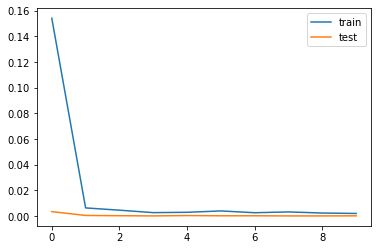

In [47]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [48]:
model.evaluate(X_test_h, y_test_h)
y_pred = model.predict(X_test_h)

843/843 [==============================] - 3s 2ms/step


In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_h,axis=1)
Y_pred = np.argmax(model.predict(X_test_h),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

843/843 [==============================] - 2s 2ms/step
Confusion Matrix
[[4377    1    0    0    0    0    0]
 [   0 4230    0    0    0    0    0]
 [   0    1 4332    0    0    0    0]
 [   0    0    0 5322    0    0    0]
 [   0    0    0    0 2165    0    0]
 [   0    0    0    0    0 4211    0]
 [   0    0    0    0    0    0 2315]]


In [51]:
%time
print(X_test_h.shape,y_test_h.shape)
base_loss,base_accuracy=model.evaluate(X_test_h,y_test_h,batch_size=batch_size,verbose=1)

# 모델 저장 경로
cnn_file=r'C:\Users\takea\Desktop\DeepLearning\datasets\week6\CNN_Model.h5'
  
tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

Wall time: 0 ns
(26954, 1, 18) (26954, 7)
843/843 [==============================] - 2s 2ms/step - loss: 4.1702e-04 - acc: 0.9999
model saved at  C:\Users\takea\Desktop\DeepLearning\datasets\week6\CNN_Model.h5
Accuracy >99.992579
Base Loss >0.00


# CASE 2

In [52]:
# Base 모델을 로드

base_model = keras.models.load_model(cnn_file)

In [58]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 256)               150528    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 7)                 903       
                                                                 
Total params: 184327 (720.03 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 184327 (720.03 KB)
_________________________________________________________________


In [59]:
# 1. new_model = keras.models.Sequential(base_model.layers[:-1])에서 맨 마지막 dennse_2레이어만 지운다.
new_model = keras.models.Sequential(base_model.layers[:-1])
base_model.trainable = False

# 2. flatten layer와 dense layer을 추가한다.
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(7, activation="sigmoid"))

In [60]:
# 몇번의 에포크 동안 훈련을 하고 나면 동결을 해제하고 
# 새로운 작업 B에 맞게 이 재사용된 층들을 세밀하게 튜닝
# 이때 학습률을 낮춰 가중치가 망가지는 것을 막아야함

new_model.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history2 = new_model.fit(X_train_c, y_train_c, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
2275/2275 [==============================] - 9s 2ms/step - loss: 0.2631 - accuracy: 0.7300 - val_loss: 0.1472 - val_accuracy: 0.9240
Epoch 2/10
2275/2275 [==============================] - 5s 2ms/step - loss: 0.1295 - accuracy: 0.9266 - val_loss: 0.1028 - val_accuracy: 0.9498
Epoch 3/10
2275/2275 [==============================] - 5s 2ms/step - loss: 0.0988 - accuracy: 0.9560 - val_loss: 0.0808 - val_accuracy: 0.9791
Epoch 4/10
2275/2275 [==============================] - 5s 2ms/step - loss: 0.0818 - accuracy: 0.9730 - val_loss: 0.0671 - val_accuracy: 0.9887
Epoch 5/10
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0708 - accuracy: 0.9807 - val_loss: 0.0578 - val_accuracy: 0.9900
Epoch 6/10
2275/2275 [==============================] - 7s 3ms/step - loss: 0.0629 - accuracy: 0.9829 - val_loss: 0.0509 - val_accuracy: 0.9934
Epoch 7/10
2275/2275 [==============================] - 5s 2ms/step - loss: 0.0571 - accuracy: 0.9858 - val_loss: 0.0457 - val_accuracy:

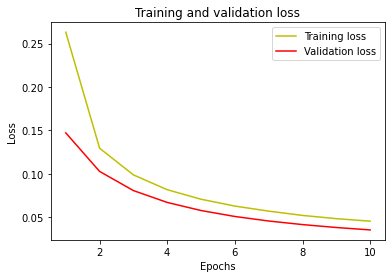

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

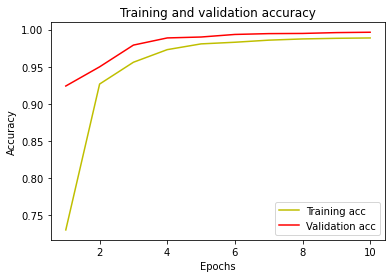

In [63]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [64]:
new_model.evaluate(X_test_c, y_test_c)
y_pred = new_model.predict(X_test_c)

843/843 [==============================] - 2s 2ms/step


In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_c,axis=1)
Y_pred = np.argmax(new_model.predict(X_test_c),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

843/843 [==============================] - 1s 2ms/step
Confusion Matrix
[[4314   64    0    0    0    0    0]
 [   0 4230    0    0    0    0    0]
 [   0    0 4333    0    0    0    0]
 [   0    0    0 5322    0    0    0]
 [   0    0    0   13 2136   16    0]
 [   0    0    0    0    0 4211    0]
 [   0    0    0    0    0    0 2315]]


# Reference Code

In [67]:
# Training and evaluating the LSTM model

model2 = keras.Sequential()
model2.add(Bidirectional(LSTM(units = 128, input_shape = [X_train_c.shape[1], X_train_c.shape[2]])))
model2.add(Dropout(rate = 0.5))
model2.add(Dense(units = 128, activation = "relu"))
model2.add(Dense(y_train_c.shape[1], activation = "softmax"))
model2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [68]:
history = model2.fit(X_train_c, y_train_c, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
2275/2275 [==============================] - 14s 4ms/step - loss: 0.1249 - acc: 0.9644 - val_loss: 0.0020 - val_acc: 0.9999
Epoch 2/10
2275/2275 [==============================] - 13s 6ms/step - loss: 0.0053 - acc: 0.9984 - val_loss: 5.8510e-04 - val_acc: 0.9998
Epoch 3/10
2275/2275 [==============================] - 13s 6ms/step - loss: 0.0036 - acc: 0.9990 - val_loss: 5.7930e-04 - val_acc: 0.9999
Epoch 4/10
2275/2275 [==============================] - 11s 5ms/step - loss: 0.0036 - acc: 0.9990 - val_loss: 1.7511e-04 - val_acc: 1.0000
Epoch 5/10
2275/2275 [==============================] - 13s 6ms/step - loss: 0.0035 - acc: 0.9990 - val_loss: 8.3650e-05 - val_acc: 1.0000
Epoch 6/10
2275/2275 [==============================] - 12s 5ms/step - loss: 0.0027 - acc: 0.9990 - val_loss: 2.5481e-06 - val_acc: 1.0000
Epoch 7/10
2275/2275 [==============================] - 13s 6ms/step - loss: 0.0019 - acc: 0.9994 - val_loss: 7.7061e-06 - val_acc: 1.0000
Epoch 8/10
2275/2275 [=========

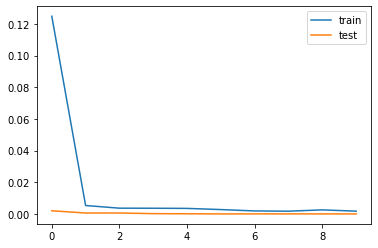

In [69]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [70]:
model2.evaluate(X_test_c, y_test_c)
y_pred = model.predict(X_test_c)

843/843 [==============================] - 2s 2ms/step


In [71]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_c,axis=1)
Y_pred = np.argmax(model2.predict(X_test_c),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

843/843 [==============================] - 3s 2ms/step
Confusion Matrix
[[4378    0    0    0    0    0    0]
 [   0 4230    0    0    0    0    0]
 [   0    0 4333    0    0    0    0]
 [   0    0    0 5322    0    0    0]
 [   0    0    0    0 2165    0    0]
 [   0    0    0    0    0 4211    0]
 [   0    0    0    0    0    0 2315]]


In [74]:
%time
print(X_test_c.shape,y_test_c.shape)
base_loss,base_accuracy=model2.evaluate(X_test_c,y_test_c,batch_size=batch_size,verbose=1)

lstm2_file=r'C:\Users\takea\Desktop\DeepLearning\datasets\week6\LSTM2_Model.h5'
  
tf.keras.models.save_model(model2, lstm2_file, include_optimizer=False)
print('model saved at ', lstm2_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

Wall time: 0 ns
(26954, 1, 18) (26954, 7)
843/843 [==============================] - 2s 2ms/step - loss: 2.8202e-05 - acc: 1.0000
model saved at  C:\Users\takea\Desktop\DeepLearning\datasets\week6\LSTM2_Model.h5
Accuracy >100.000000
Base Loss >0.00


In [75]:
# Base 모델을 로드

base2_model = keras.models.load_model(lstm2_file)

In [76]:
base2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 256)               150528    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 7)                 903       
                                                                 
Total params: 184327 (720.03 KB)
Trainable params: 184327 (720.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
new2_model = keras.models.Sequential(base2_model.layers[:-1])
base2_model.trainable = False

new2_model.add(keras.layers.Flatten())
new2_model.add(keras.layers.Dense(7, activation="sigmoid"))

In [79]:
# 몇번의 에포크 동안 훈련을 하고 나면 동결을 해제하고 
# 새로운 작업 B에 맞게 이 재사용된 층들을 세밀하게 튜닝
# 이때 학습률을 낮춰 가중치가 망가지는 것을 막아야함

new2_model.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history3 = new2_model.fit(X_train_h, y_train_h, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new2_model.summary()

Epoch 1/10
2275/2275 [==============================] - 11s 3ms/step - loss: 0.1329 - accuracy: 0.9012 - val_loss: 0.0734 - val_accuracy: 0.9827
Epoch 2/10
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0737 - accuracy: 0.9588 - val_loss: 0.0520 - val_accuracy: 0.9895
Epoch 3/10
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0603 - accuracy: 0.9654 - val_loss: 0.0423 - val_accuracy: 0.9938
Epoch 4/10
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9682 - val_loss: 0.0368 - val_accuracy: 0.9944
Epoch 5/10
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0484 - accuracy: 0.9702 - val_loss: 0.0325 - val_accuracy: 0.9957
Epoch 6/10
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9706 - val_loss: 0.0298 - val_accuracy: 0.9955
Epoch 7/10
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0433 - accuracy: 0.9715 - val_loss: 0.0278 - val_accuracy

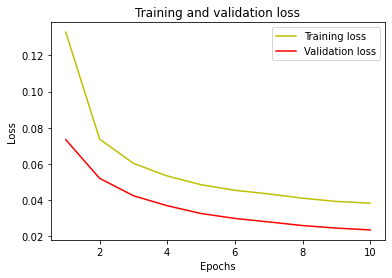

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

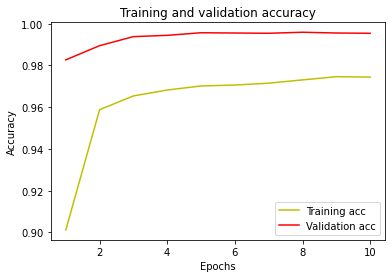

In [81]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
new2_model.evaluate(X_test_h, y_test_h)
y_pred = new2_model.predict(X_test_h)

843/843 [==============================] - 2s 2ms/step


In [83]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_h,axis=1)
Y_pred = np.argmax(new2_model.predict(X_test_h),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

843/843 [==============================] - 2s 2ms/step
Confusion Matrix
[[4377    1    0    0    0    0    0]
 [  47 4183    0    0    0    0    0]
 [   0   51 4280    2    0    0    0]
 [   0    0    0 5320    2    0    0]
 [   0    0    0    1 2163    1    0]
 [   0    0    0    0    4 4207    0]
 [   0    0    0    0    0    0 2315]]
